code to calculate the correlations (within-subject) between brain and behavior (table 1 in paper) for all 4 neural codes

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.utils import shuffle
import numpy as np
import seaborn
import random

In [2]:
# load neural strength values for perception code

file_path_perception = "/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/perception_per_ritual_within_wedding_notdistilled_madeAfterPvalues.json"

# function to load json file
with open(file_path_perception, "r") as json_file:
    dictionary_with_info_perception = json.load(json_file) 
    

In [3]:
# load neural strength values for rotated code

file_path_rotated = "/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/rotated_per_ritual_within_wedding_notdistilled_madeAfterPvalues.json"

# function to load json file
with open(file_path_rotated, "r") as json_file:
    dictionary_with_info_rotated = json.load(json_file) 


In [4]:
# load neural strength values for schema code

file_path_schema = "/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/schema_per_ritual_within_wedding_notdistilled_madeAfterPvalues.json"

# function to load json file
with open(file_path_schema, "r") as json_file:
    dictionary_with_info_schema = json.load(json_file) 


In [5]:
# load neural strength values for revised path code

file_path_revisedpath = "/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/REVISED_path_per_ritual_within_wedding_notdistilled_madeAfterPvalues.json"

# function to load json file
with open(file_path_revisedpath, "r") as json_file:
    dictionary_with_info_revisedpath = json.load(json_file)
    

In [6]:
# settings

AllSubjects = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]


In [7]:
# load schema behav
schematest = pd.read_csv('/Volumes/norman/scollin/schema/data/behav/results/Schematest.csv')
schematest['diffScore'] = schematest['Correct'] - schematest['Opposite']

## load recall behav measures
EpisodicDetails_Correct = pd.read_csv('/Volumes/norman/scollin/schema/data/behav/recallTranscriptions/EpisodicDetails_Correct.csv')
EpisodicDetails_Incorrect = pd.read_csv('/Volumes/norman/scollin/schema/data/behav/recallTranscriptions/EpisodicDetails_Incorrect.csv')
Rituals_Correct =  pd.read_csv('/Volumes/norman/scollin/schema/data/behav/recallTranscriptions/Rituals_Correct.csv')
Rituals_Incorrect =  pd.read_csv('/Volumes/norman/scollin/schema/data/behav/recallTranscriptions/Rituals_Incorrect.csv')


# SCHEMA CODE TO BEHAV

In [8]:
# schema code

result_schema = pd.DataFrame(columns=[])
result_schema_r = pd.DataFrame(columns=[])
result_schema_r_rituals = pd.DataFrame(columns=[])

for CurrSub in AllSubjects: 

    sub = "sub-1%02d" % (CurrSub)
        #print(sub)
    sub2 = 's%d' % (CurrSub)

    Correct_minus_Incorrect_Details = EpisodicDetails_Correct.loc[:, [sub2]]-EpisodicDetails_Incorrect.loc[:, [sub2]] 
    Correct_minus_Incorrect_Rituals = Rituals_Correct.loc[:, [sub2]]-Rituals_Incorrect.loc[:, [sub2]] 

    result_schema_tmp = pd.DataFrame(columns=[])
    result_schema_tmp_subj = pd.DataFrame(columns=[])

    for currLoop in range(12): # loop over 12 weddings

        result_schema_averageCurrLoop = pd.DataFrame(columns=[])

            #append event2
        result_schema_tmp = result_schema_tmp.append(pd.Series(dictionary_with_info_schema[sub][str(currLoop)]['2'],name=currLoop))
        result_schema_averageCurrLoop = result_schema_averageCurrLoop.append(pd.Series(dictionary_with_info_schema[sub][str(currLoop)]['2'],name=currLoop))

            #append event3
        result_schema_tmp = result_schema_tmp.append(pd.Series(dictionary_with_info_schema[sub][str(currLoop)]['3'],name=currLoop))
        result_schema_averageCurrLoop = result_schema_averageCurrLoop.append(pd.Series(dictionary_with_info_schema[sub][str(currLoop)]['3'],name=currLoop))

            #append event4
        result_schema_tmp = result_schema_tmp.append(pd.Series(dictionary_with_info_schema[sub][str(currLoop)]['4'],name=currLoop))
        result_schema_averageCurrLoop = result_schema_averageCurrLoop.append(pd.Series(dictionary_with_info_schema[sub][str(currLoop)]['4'],name=currLoop))

        result_schema_tmp_subj = result_schema_tmp_subj.append(pd.Series(result_schema_averageCurrLoop.mean(),name=currLoop))
        
        # append average (across event2/3/4) of subj to result_schema dataframe
        #print(result_schema_tmp)

    result_schema = result_schema.append(pd.Series(result_schema_tmp.mean(),name=CurrSub))

    #within subj correlation
    result_schema_r = result_schema_r.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Details,result_schema_tmp_subj)[0],name=CurrSub))
    result_schema_r_rituals = result_schema_r_rituals.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Rituals,result_schema_tmp_subj)[0],name=CurrSub))

    print(Correct_minus_Incorrect_Details)
    
#fisher z transform before t test
result_schema_r_fisherz = np.arctanh(result_schema_r)
result_schema_r_rituals_fisherz = np.arctanh(result_schema_r_rituals)


    s2
0    0
1   -1
2   -2
3    0
4    0
5    0
6   -2
7    0
8   -1
9    2
10   1
11   0
    s3
0    0
1    0
2    2
3    0
4    4
5    5
6    6
7    0
8    1
9    7
10   5
11   3
    s4
0    0
1   -1
2    0
3    6
4    0
5    1
6    2
7    0
8    0
9   -1
10   2
11   0
    s5
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
10   0
11   0
    s6
0   -2
1    0
2    1
3   -1
4    4
5   -1
6    0
7    0
8    3
9   -2
10   5
11   1
    s7
0    2
1    6
2    1
3    4
4    2
5    4
6    6
7    5
8    1
9    5
10   5
11   2
    s8
0    4
1    3
2   -2
3    0
4    5
5    1
6    0
7   -1
8    2
9    0
10   1
11  -4
    s9
0    5
1    1
2   -1
3    0
4    4
5   -1
6   -1
7    0
8    1
9    1
10   0
11  -3
    s10
0     0
1     2
2     0
3     4
4     0
5     6
6     4
7     7
8     1
9     2
10    1
11    4
    s11
0     4
1    -4
2     2
3     0
4     0
5     1
6     9
7     3
8     1
9     1
10   -1
11    5
    s12
0     0
1    -5
2    -1
3     0
4     2
5     0
6    -1


In [9]:
# print the mean and sem of the R values

print('mean r (details)', result_schema_r_fisherz.mean())
print('sem r (details)', result_schema_r_fisherz.sem())

print('mean r (rituals)', result_schema_r_rituals_fisherz.mean())
print('sem r (rituals)', result_schema_r_rituals_fisherz.sem())



mean r (details) 0    0.086267
dtype: float64
sem r (details) 0    0.045326
dtype: float64
mean r (rituals) 0    0.094166
dtype: float64
sem r (rituals) 0    0.043256
dtype: float64


## null distribution

ONLY RAN ONCE, THEN SAVED NULL DISTRIBUTIONS (CAN BE LOADED WITH SUBSEQUENT CODE BLOCK)

In [ ]:
# schema code

result_schema_ttest_nullDistribution = pd.DataFrame(columns=[])
result_schema_ttest_rituals_nullDistribution = pd.DataFrame(columns=[])

for currIter in range(1000): 

    shuffle_tmp = pd.DataFrame(columns=[])
    shuffle_tmp2 = pd.DataFrame(columns=[])
 
    for CurrSub in AllSubjects: 

        sub = "sub-1%02d" % (CurrSub)
        #print(sub)
        sub2 = 's%d' % (CurrSub)

        Correct_minus_Incorrect_Details = EpisodicDetails_Correct.loc[:, [sub2]]-EpisodicDetails_Incorrect.loc[:, [sub2]] 
        Correct_minus_Incorrect_Rituals = Rituals_Correct.loc[:, [sub2]]-Rituals_Incorrect.loc[:, [sub2]] 

        result_schema_tmp = pd.DataFrame(columns=[])
        result_schema_tmp_subj = pd.DataFrame(columns=[])

        for currLoop in range(12): # loop over 12 weddings

            result_schema_averageCurrLoop = pd.DataFrame(columns=[])

            #append event2
            result_schema_tmp = result_schema_tmp.append(pd.Series(dictionary_with_info_schema[sub][str(currLoop)]['2'],name=currLoop))
            result_schema_averageCurrLoop = result_schema_averageCurrLoop.append(pd.Series(dictionary_with_info_schema[sub][str(currLoop)]['2'],name=currLoop))

            #append event3
            result_schema_tmp = result_schema_tmp.append(pd.Series(dictionary_with_info_schema[sub][str(currLoop)]['3'],name=currLoop))
            result_schema_averageCurrLoop = result_schema_averageCurrLoop.append(pd.Series(dictionary_with_info_schema[sub][str(currLoop)]['3'],name=currLoop))

            #append event4
            result_schema_tmp = result_schema_tmp.append(pd.Series(dictionary_with_info_schema[sub][str(currLoop)]['4'],name=currLoop))
            result_schema_averageCurrLoop = result_schema_averageCurrLoop.append(pd.Series(dictionary_with_info_schema[sub][str(currLoop)]['4'],name=currLoop))

            result_schema_tmp_subj = result_schema_tmp_subj.append(pd.Series(result_schema_averageCurrLoop.mean(),name=currLoop))

        ## create null distribution by shuffling behavioral scores of 12 weddings within subj and then run correlation, 1000 times
        Correct_minus_Incorrect_Details_shuffle = shuffle(Correct_minus_Incorrect_Details)
        Correct_minus_Incorrect_Details_shuffle = Correct_minus_Incorrect_Details_shuffle.to_numpy()
        shuffle_tmp = shuffle_tmp.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Details_shuffle,result_schema_tmp_subj)[0],name=CurrSub))

        Correct_minus_Incorrect_Rituals_shuffle = shuffle(Correct_minus_Incorrect_Rituals)
        Correct_minus_Incorrect_Rituals_shuffle = Correct_minus_Incorrect_Rituals_shuffle.to_numpy()
        shuffle_tmp2 = shuffle_tmp2.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Rituals_shuffle,result_schema_tmp_subj)[0],name=CurrSub))

    #fisher z transform before t test
    shuffle_tmp_fisherz = np.arctanh(shuffle_tmp)
    shuffle_tmp2_fisherz = np.arctanh(shuffle_tmp2)

    result_schema_ttest_nullDistribution = result_schema_ttest_nullDistribution.append(pd.Series(stats.ttest_1samp(shuffle_tmp_fisherz,popmean=0)[0],name=currIter))
    result_schema_ttest_rituals_nullDistribution = result_schema_ttest_rituals_nullDistribution.append(pd.Series(stats.ttest_1samp(shuffle_tmp2_fisherz,popmean=0)[0],name=currIter))

result_schema_ttest_nullDistribution.to_csv('result_schema_ttest_nullDistribution_NEW.csv')
result_schema_ttest_rituals_nullDistribution.to_csv('result_schema_ttest_rituals_nullDistribution_NEW.csv')


In [10]:
## LOAD NULL DISTRIBUTION (SINCE IT WAS ALREADY RAN AND SAVED)

result_schema_ttest_nullDistribution = pd.read_csv('/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/result_schema_ttest_nullDistribution_NEW.csv')
result_schema_ttest_rituals_nullDistribution = pd.read_csv('/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/result_schema_ttest_rituals_nullDistribution_NEW.csv')


instances above red line: 28
p val from distribution: 0.028


Text(-3, 35, 'p = 0.028')

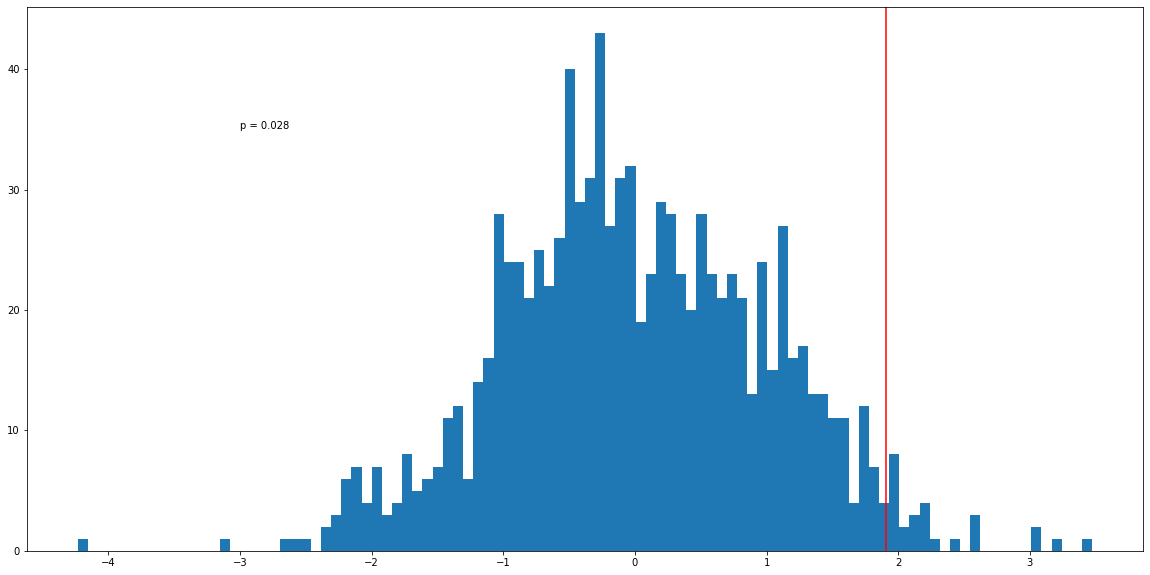

In [11]:
# plot null distribution details
x = np.arange(0,1000,1)
y = result_schema_ttest_nullDistribution['0'].to_numpy()
y = np.reshape(y, (-1,))

plt.figure(figsize=(20,10))
plt.hist(y,bins=100)
plt.axvline(stats.ttest_1samp(result_schema_r_fisherz,popmean=0)[0],color='r')

print('instances above red line:', np.count_nonzero(y > stats.ttest_1samp(result_schema_r_fisherz,popmean=0)[0]))
print('p val from distribution:', np.count_nonzero(y > stats.ttest_1samp(result_schema_r_fisherz,popmean=0)[0]) / len(y))

s = 'p = ' + str(np.count_nonzero(y > stats.ttest_1samp(result_schema_r_fisherz,popmean=0)[0]) / len(y))

plt.text(-3,35,s)

#plt.savefig('/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/final_figures_GoodResolution/details_vs_schemaStrength_tscores_to_null_NEW.eps')


instances above red line: 22
p val from distribution: 0.022


Text(-3, 35, 'p = 0.022')

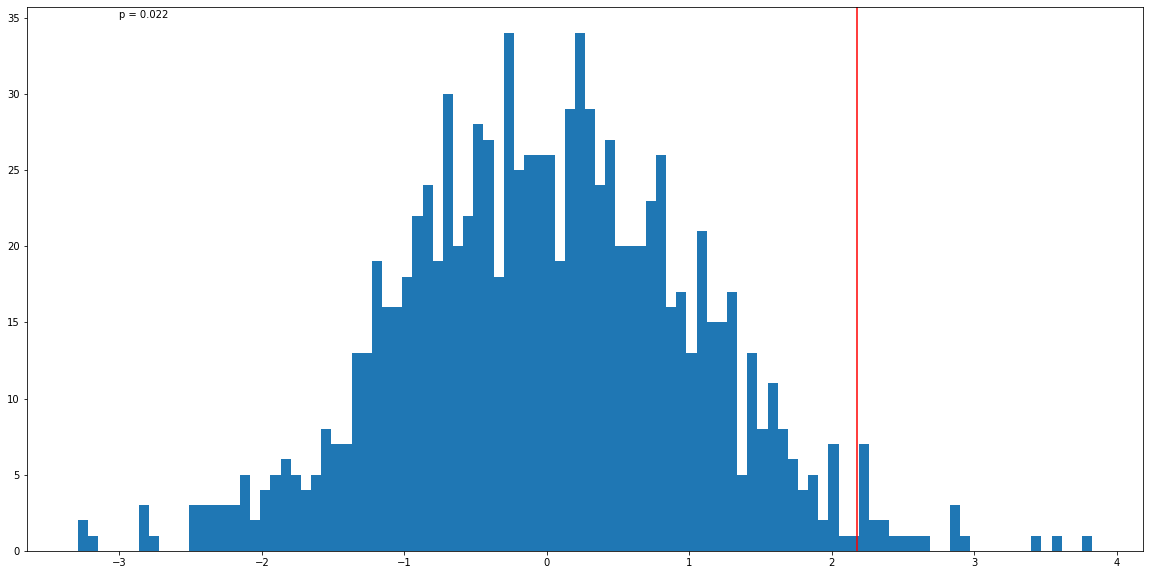

In [12]:
# plot null distribution rituals
x = np.arange(0,1000,1)
y = result_schema_ttest_rituals_nullDistribution['0'].to_numpy()
y = np.reshape(y, (-1,))

plt.figure(figsize=(20,10))
plt.hist(y,bins=100)
plt.axvline(stats.ttest_1samp(result_schema_r_rituals_fisherz,popmean=0)[0],color='r')

print('instances above red line:', np.count_nonzero(y > stats.ttest_1samp(result_schema_r_rituals_fisherz,popmean=0)[0]))
print('p val from distribution:', np.count_nonzero(y > stats.ttest_1samp(result_schema_r_rituals_fisherz,popmean=0)[0]) / len(y))

s = 'p = ' + str(np.count_nonzero(y > stats.ttest_1samp(result_schema_r_rituals_fisherz,popmean=0)[0]) / len(y))

plt.text(-3,35,s)


#plt.savefig('/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/final_figures_GoodResolution/rituals_vs_schemaStrength_tscores_to_null_NEW.png')

## rotated code

In [13]:

result_rotated = pd.DataFrame(columns=[])
result_rotated_r = pd.DataFrame(columns=[])
result_rotated_r_rituals = pd.DataFrame(columns=[])

for CurrSub in AllSubjects: 

    sub = "sub-1%02d" % (CurrSub)
        #print(sub)
    sub2 = 's%d' % (CurrSub)

    Correct_minus_Incorrect_Details = EpisodicDetails_Correct.loc[:, [sub2]]-EpisodicDetails_Incorrect.loc[:, [sub2]] 
    Correct_minus_Incorrect_Rituals = Rituals_Correct.loc[:, [sub2]]-Rituals_Incorrect.loc[:, [sub2]] 

    result_rotated_tmp = pd.DataFrame(columns=[])
    result_rotated_tmp_subj = pd.DataFrame(columns=[])
    
    for currLoop in range(12): # loop over 12 weddings

        result_rotated_averageCurrLoop = pd.DataFrame(columns=[])
        
        #append event2
        result_rotated_tmp = result_rotated_tmp.append(pd.Series(dictionary_with_info_rotated[sub][str(currLoop)]['2'],name=currLoop))
        result_rotated_averageCurrLoop = result_rotated_averageCurrLoop.append(pd.Series(dictionary_with_info_rotated[sub][str(currLoop)]['2'],name=currLoop))

        #append event3
        result_rotated_tmp = result_rotated_tmp.append(pd.Series(dictionary_with_info_rotated[sub][str(currLoop)]['3'],name=currLoop))
        result_rotated_averageCurrLoop = result_rotated_averageCurrLoop.append(pd.Series(dictionary_with_info_rotated[sub][str(currLoop)]['3'],name=currLoop))

        #append event4 (removed for rotated code because only e2 and e3 taken into account)
#        result_rotated_tmp = result_rotated_tmp.append(pd.Series(dictionary_with_info_rotated[sub][str(currLoop)]['4'],name=currLoop))
#        result_rotated_averageCurrLoop = result_rotated_averageCurrLoop.append(pd.Series(dictionary_with_info_rotated[sub][str(currLoop)]['4'],name=currLoop))

        result_rotated_tmp_subj = result_rotated_tmp_subj.append(pd.Series(result_rotated_averageCurrLoop.mean(),name=currLoop))
        
    # append average (across event2/3/4) of subj to rotated dataframe
    
    result_rotated = result_rotated.append(pd.Series(result_rotated_tmp.mean(),name=CurrSub))

    #within subj correlation
    result_rotated_r = result_rotated_r.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Details,result_rotated_tmp_subj)[0],name=CurrSub))
    result_rotated_r_rituals = result_rotated_r_rituals.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Rituals,result_rotated_tmp_subj)[0],name=CurrSub))

#fisher z transform before t test
result_rotated_r_fisherz = np.arctanh(result_rotated_r)
result_rotated_r_rituals_fisherz = np.arctanh(result_rotated_r_rituals)


In [15]:
# print the mean and sem of the R values

print('mean r (details)', result_rotated_r_fisherz.mean())
print('sem r (details)', result_rotated_r_fisherz.sem())

print('mean r (rituals)', result_rotated_r_rituals_fisherz.mean())
print('sem r (rituals)', result_rotated_r_rituals_fisherz.sem())

mean r (details) 0    0.039941
dtype: float64
sem r (details) 0    0.059306
dtype: float64
mean r (rituals) 0   -0.020218
dtype: float64
sem r (rituals) 0    0.050997
dtype: float64


In [ ]:
## null distribution

## ONLY RAN ONCE, THEN SAVED, CAN BE RELOADED WITH CODE BLOCK BELOW

result_rotated_ttest_nullDistribution = pd.DataFrame(columns=[])
result_rotated_ttest_rituals_nullDistribution = pd.DataFrame(columns=[])

for currIter in range(1000): 

    shuffle_tmp = pd.DataFrame(columns=[])
    shuffle_tmp2 = pd.DataFrame(columns=[])

    for CurrSub in AllSubjects: 

        sub = "sub-1%02d" % (CurrSub)
        #print(sub)
        sub2 = 's%d' % (CurrSub)

        Correct_minus_Incorrect_Details = EpisodicDetails_Correct.loc[:, [sub2]]-EpisodicDetails_Incorrect.loc[:, [sub2]] 
        Correct_minus_Incorrect_Rituals = Rituals_Correct.loc[:, [sub2]]-Rituals_Incorrect.loc[:, [sub2]] 
   
        result_rotated_tmp = pd.DataFrame(columns=[])
        result_rotated_tmp_subj = pd.DataFrame(columns=[])

        for currLoop in range(12): # loop over 12 weddings

            result_rotated_averageCurrLoop = pd.DataFrame(columns=[])
        
        #append event2
            result_rotated_tmp = result_rotated_tmp.append(pd.Series(dictionary_with_info_rotated[sub][str(currLoop)]['2'],name=currLoop))
            result_rotated_averageCurrLoop = result_rotated_averageCurrLoop.append(pd.Series(dictionary_with_info_rotated[sub][str(currLoop)]['2'],name=currLoop))

        #append event3
            result_rotated_tmp = result_rotated_tmp.append(pd.Series(dictionary_with_info_rotated[sub][str(currLoop)]['3'],name=currLoop))
            result_rotated_averageCurrLoop = result_rotated_averageCurrLoop.append(pd.Series(dictionary_with_info_rotated[sub][str(currLoop)]['3'],name=currLoop))

        #append event4 (removed for rotated code because only e2 and e3 taken into account)
#            result_rotated_tmp = result_rotated_tmp.append(pd.Series(dictionary_with_info_rotated[sub][str(currLoop)]['4'],name=currLoop))
#            result_rotated_averageCurrLoop = result_rotated_averageCurrLoop.append(pd.Series(dictionary_with_info_rotated[sub][str(currLoop)]['4'],name=currLoop))

            result_rotated_tmp_subj = result_rotated_tmp_subj.append(pd.Series(result_rotated_averageCurrLoop.mean(),name=currLoop))
        
        ## create null distribution by shuffling behavioral scores of 12 weddings within subj and then run correlation, 1000 times
        Correct_minus_Incorrect_Details_shuffle = shuffle(Correct_minus_Incorrect_Details)
        Correct_minus_Incorrect_Details_shuffle = Correct_minus_Incorrect_Details_shuffle.to_numpy()
        shuffle_tmp = shuffle_tmp.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Details_shuffle,result_rotated_tmp_subj)[0],name=CurrSub))

        Correct_minus_Incorrect_Rituals_shuffle = shuffle(Correct_minus_Incorrect_Rituals)
        Correct_minus_Incorrect_Rituals_shuffle = Correct_minus_Incorrect_Rituals_shuffle.to_numpy()
        shuffle_tmp2 = shuffle_tmp2.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Rituals_shuffle,result_rotated_tmp_subj)[0],name=CurrSub))

    #fisher z transform before t test
    shuffle_tmp_fisherz = np.arctanh(shuffle_tmp)
    shuffle_tmp2_fisherz = np.arctanh(shuffle_tmp2)

    result_rotated_ttest_nullDistribution = result_rotated_ttest_nullDistribution.append(pd.Series(stats.ttest_1samp(shuffle_tmp_fisherz,popmean=0)[0],name=currIter))
    result_rotated_ttest_rituals_nullDistribution = result_rotated_ttest_rituals_nullDistribution.append(pd.Series(stats.ttest_1samp(shuffle_tmp2_fisherz,popmean=0)[0],name=currIter))

result_rotated_ttest_nullDistribution.to_csv('result_rotated_ttest_nullDistributionNEW.csv')
result_rotated_ttest_rituals_nullDistribution.to_csv('result_rotated_ttest_rituals_nullDistributionNEW.csv')


In [14]:
## LOAD NULL DISTRIBUTIONS (SINCE IT WAS ALREADY RAN AND SAVED)

result_rotated_ttest_nullDistribution = pd.read_csv('/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/result_rotated_ttest_nullDistributionNEW.csv')
result_rotated_ttest_rituals_nullDistribution = pd.read_csv('/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/result_rotated_ttest_rituals_nullDistributionNEW.csv')


instances above red line: 253
p val from distribution: 0.253


Text(-3, 35, 'p = 0.253')

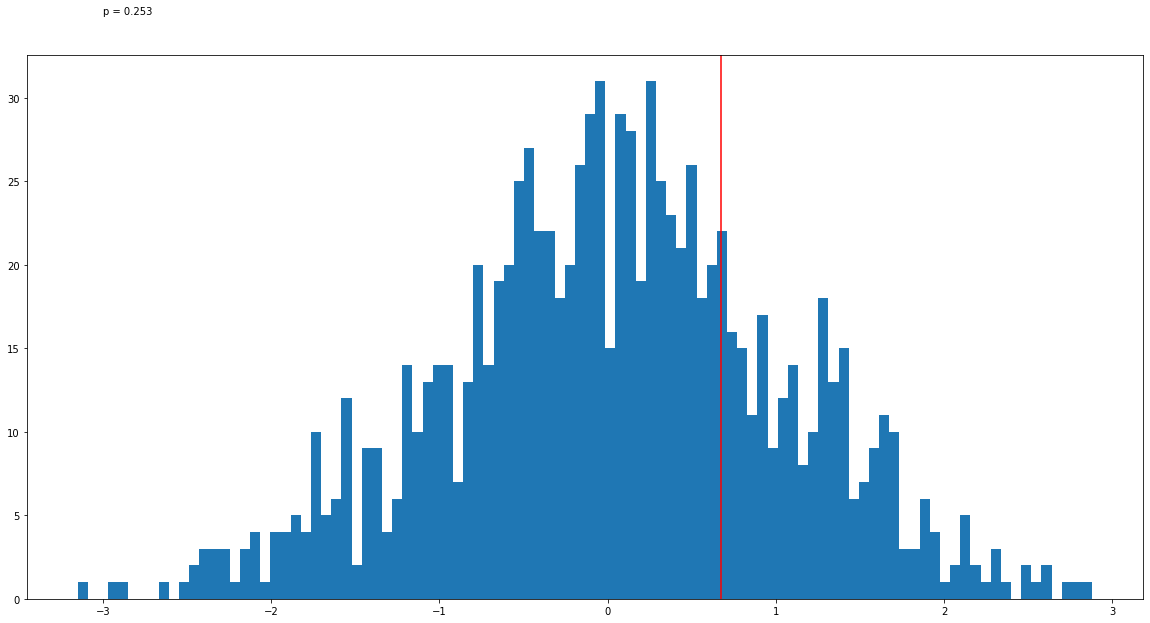

In [17]:
# plot null distribution details
x = np.arange(0,1000,1)
y = result_rotated_ttest_nullDistribution['0'].to_numpy()
y = np.reshape(y, (-1,))

plt.figure(figsize=(20,10))
plt.hist(y,bins=100)
plt.axvline(stats.ttest_1samp(result_rotated_r_fisherz,popmean=0)[0],color='r')

print('instances above red line:', np.count_nonzero(y > stats.ttest_1samp(result_rotated_r_fisherz,popmean=0)[0]))
print('p val from distribution:', np.count_nonzero(y > stats.ttest_1samp(result_rotated_r_fisherz,popmean=0)[0]) / len(y))

s = 'p = ' + str(np.count_nonzero(y > stats.ttest_1samp(result_rotated_r_fisherz,popmean=0)[0]) / len(y))

plt.text(-3,35,s)

# plt.savefig('details_vs_rotatedStrength_tscores_to_nullNEW.png')

instances above red line: 642
p val from distribution: 0.642


Text(-3, 35, 'p = 0.642')

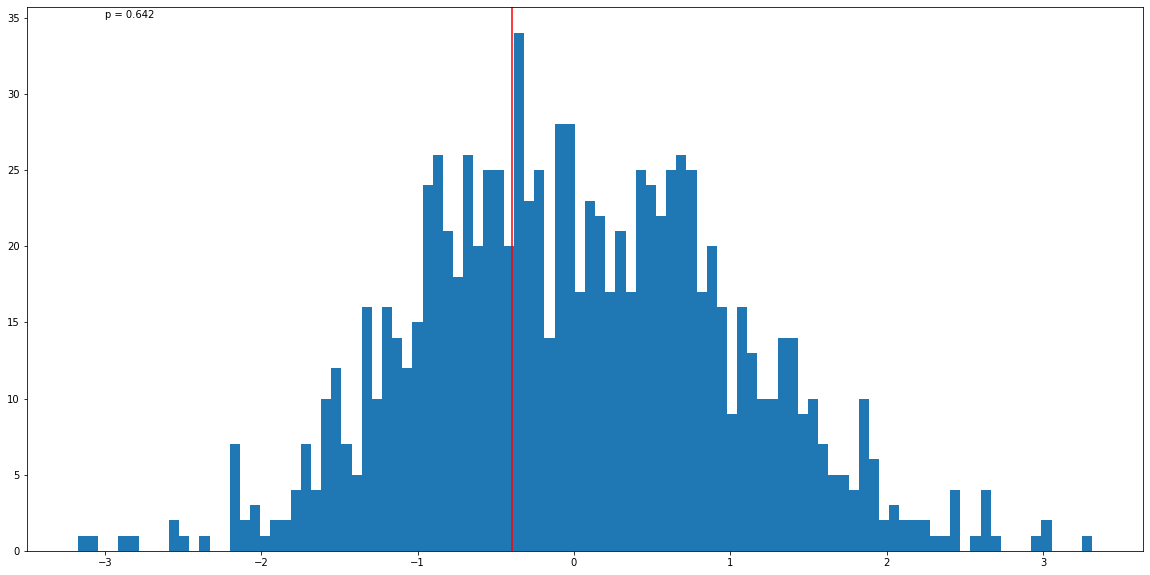

In [18]:
# plot null distribution rituals
x = np.arange(0,1000,1)
y = result_rotated_ttest_rituals_nullDistribution['0'].to_numpy()
y = np.reshape(y, (-1,))

plt.figure(figsize=(20,10))
plt.hist(y,bins=100)
plt.axvline(stats.ttest_1samp(result_rotated_r_rituals_fisherz,popmean=0)[0],color='r')

print('instances above red line:', np.count_nonzero(y > stats.ttest_1samp(result_rotated_r_rituals_fisherz,popmean=0)[0]))
print('p val from distribution:', np.count_nonzero(y > stats.ttest_1samp(result_rotated_r_rituals_fisherz,popmean=0)[0]) / len(y))

s = 'p = ' + str(np.count_nonzero(y > stats.ttest_1samp(result_rotated_r_rituals_fisherz,popmean=0)[0]) / len(y))

plt.text(-3,35,s)


# plt.savefig('rituals_vs_rotatedStrength_tscores_to_nullNEW.png')

## PATH CODE

In [20]:


result_path = pd.DataFrame(columns=[])
result_path_r = pd.DataFrame(columns=[])
result_path_r_rituals = pd.DataFrame(columns=[])

for CurrSub in AllSubjects: 

    sub = "sub-1%02d" % (CurrSub)
    #print(sub)
    sub2 = 's%d' % (CurrSub)
    
    Correct_minus_Incorrect_Details = EpisodicDetails_Correct.loc[:, [sub2]]-EpisodicDetails_Incorrect.loc[:, [sub2]]
    Correct_minus_Incorrect_Rituals = Rituals_Correct.loc[:, [sub2]]-Rituals_Incorrect.loc[:, [sub2]] 

    result_path_tmp = pd.DataFrame(columns=[])
    result_path_tmp_subj = pd.DataFrame(columns=[])
    
    for currLoop in range(12): # loop over 12 weddings
        
        result_path_averageCurrLoop = pd.DataFrame(columns=[])
        
        #append event2
        result_path_tmp = result_path_tmp.append(pd.Series(dictionary_with_info_revisedpath[sub][str(currLoop)]['2'],name=currLoop))
        result_path_averageCurrLoop = result_path_averageCurrLoop.append(pd.Series(dictionary_with_info_revisedpath[sub][str(currLoop)]['2'],name=currLoop))

        #append event3
        result_path_tmp = result_path_tmp.append(pd.Series(dictionary_with_info_revisedpath[sub][str(currLoop)]['3'],name=currLoop))
        result_path_averageCurrLoop = result_path_averageCurrLoop.append(pd.Series(dictionary_with_info_revisedpath[sub][str(currLoop)]['3'],name=currLoop))

        #append event4
        result_path_tmp = result_path_tmp.append(pd.Series(dictionary_with_info_revisedpath[sub][str(currLoop)]['4'],name=currLoop))
        result_path_averageCurrLoop = result_path_averageCurrLoop.append(pd.Series(dictionary_with_info_revisedpath[sub][str(currLoop)]['4'],name=currLoop))

        result_path_tmp_subj = result_path_tmp_subj.append(pd.Series(result_path_averageCurrLoop.mean(),name=currLoop))
        
    # append average (across event2/3/4) of subj to result_perception dataframe
    
    result_path = result_path.append(pd.Series(result_path_tmp.mean(),name=CurrSub))

    #within subj correlation
    result_path_r = result_path_r.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Details,result_path_tmp_subj)[0],name=CurrSub))
    result_path_r_rituals = result_path_r_rituals.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Rituals,result_path_tmp_subj)[0],name=CurrSub))

#fisher z transform before t test
result_path_r_fisherz = np.arctanh(result_path_r)
result_path_r_rituals_fisherz = np.arctanh(result_path_r_rituals)


In [21]:
# print the mean and sem of the R values

print('mean r (details)', result_path_r_fisherz.mean())
print('sem r (details)', result_path_r_fisherz.sem())

print('mean r (rituals)', result_path_r_rituals_fisherz.mean())
print('sem r (rituals)', result_path_r_rituals_fisherz.sem())

mean r (details) 0   -0.005921
dtype: float64
sem r (details) 0    0.049213
dtype: float64
mean r (rituals) 0   -0.015517
dtype: float64
sem r (rituals) 0    0.053351
dtype: float64


In [ ]:
# null distribution (only ran once, than load saved distributions)

result_path_ttest_nullDistribution = pd.DataFrame(columns=[])
result_path_ttest_rituals_nullDistribution = pd.DataFrame(columns=[])

for currIter in range(1000): 

    print(currIter)
    
    shuffle_tmp = pd.DataFrame(columns=[])
    shuffle_tmp2 = pd.DataFrame(columns=[])

    for CurrSub in AllSubjects: 

        sub = "sub-1%02d" % (CurrSub)
        #print(sub)
        sub2 = 's%d' % (CurrSub)

        Correct_minus_Incorrect_Details = EpisodicDetails_Correct.loc[:, [sub2]]-EpisodicDetails_Incorrect.loc[:, [sub2]] 
        Correct_minus_Incorrect_Rituals = Rituals_Correct.loc[:, [sub2]]-Rituals_Incorrect.loc[:, [sub2]]
   
        result_path_tmp = pd.DataFrame(columns=[])
        result_path_tmp_subj = pd.DataFrame(columns=[])

        for currLoop in range(12): # loop over 12 weddings

            result_path_averageCurrLoop = pd.DataFrame(columns=[])

            #append event2
            result_path_tmp = result_path_tmp.append(pd.Series(dictionary_with_info_revisedpath[sub][str(currLoop)]['2'],name=currLoop))
            result_path_averageCurrLoop = result_path_averageCurrLoop.append(pd.Series(dictionary_with_info_revisedpath[sub][str(currLoop)]['2'],name=currLoop))
            
            #append event3
            result_path_tmp = result_path_tmp.append(pd.Series(dictionary_with_info_revisedpath[sub][str(currLoop)]['3'],name=currLoop))
            result_path_averageCurrLoop = result_path_averageCurrLoop.append(pd.Series(dictionary_with_info_revisedpath[sub][str(currLoop)]['3'],name=currLoop))

            #append event4
            result_path_tmp = result_path_tmp.append(pd.Series(dictionary_with_info_revisedpath[sub][str(currLoop)]['4'],name=currLoop))
            result_path_averageCurrLoop = result_path_averageCurrLoop.append(pd.Series(dictionary_with_info_revisedpath[sub][str(currLoop)]['4'],name=currLoop))

            result_path_tmp_subj = result_path_tmp_subj.append(pd.Series(result_path_averageCurrLoop.mean(),name=currLoop))

        ## create null distribution by shuffling behavioral scores of 12 weddings within subj and then run correlation, 1000 times
        Correct_minus_Incorrect_Details_shuffle = shuffle(Correct_minus_Incorrect_Details)
        Correct_minus_Incorrect_Details_shuffle = Correct_minus_Incorrect_Details_shuffle.to_numpy()
        shuffle_tmp = shuffle_tmp.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Details_shuffle,result_path_tmp_subj)[0],name=CurrSub))

        Correct_minus_Incorrect_Rituals_shuffle = shuffle(Correct_minus_Incorrect_Rituals)
        Correct_minus_Incorrect_Rituals_shuffle = Correct_minus_Incorrect_Rituals_shuffle.to_numpy()
        shuffle_tmp2 = shuffle_tmp2.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Rituals_shuffle,result_path_tmp_subj)[0],name=CurrSub))
        
    #fisher z transform before t test
    shuffle_tmp_fisherz = np.arctanh(shuffle_tmp)
    shuffle_tmp2_fisherz = np.arctanh(shuffle_tmp2)

    result_path_ttest_nullDistribution = result_path_ttest_nullDistribution.append(pd.Series(stats.ttest_1samp(shuffle_tmp_fisherz,popmean=0)[0],name=currIter))
    result_path_ttest_rituals_nullDistribution = result_path_ttest_rituals_nullDistribution.append(pd.Series(stats.ttest_1samp(shuffle_tmp2_fisherz,popmean=0)[0],name=currIter))

result_path_ttest_nullDistribution.to_csv('result_revisedpath_ttest_nullDistribution_NEW.csv')
result_path_ttest_rituals_nullDistribution.to_csv('result_revisedpath_ttest_rituals_nullDistribution_NEW.csv')


In [27]:
## LOAD NULL DISTRIBUTIONS (SINCE IT WAS ALREADY RAN AND SAVED)

result_revisedpath_ttest_nullDistribution = pd.read_csv('/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/result_revisedpath_ttest_nullDistribution_NEW.csv')
result_revisedpath_ttest_rituals_nullDistribution = pd.read_csv('/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/result_revisedpath_ttest_rituals_nullDistribution_NEW.csv')


instances above red line: 562
p val from distribution: 0.562


Text(-3, 35, 'p = 0.562')

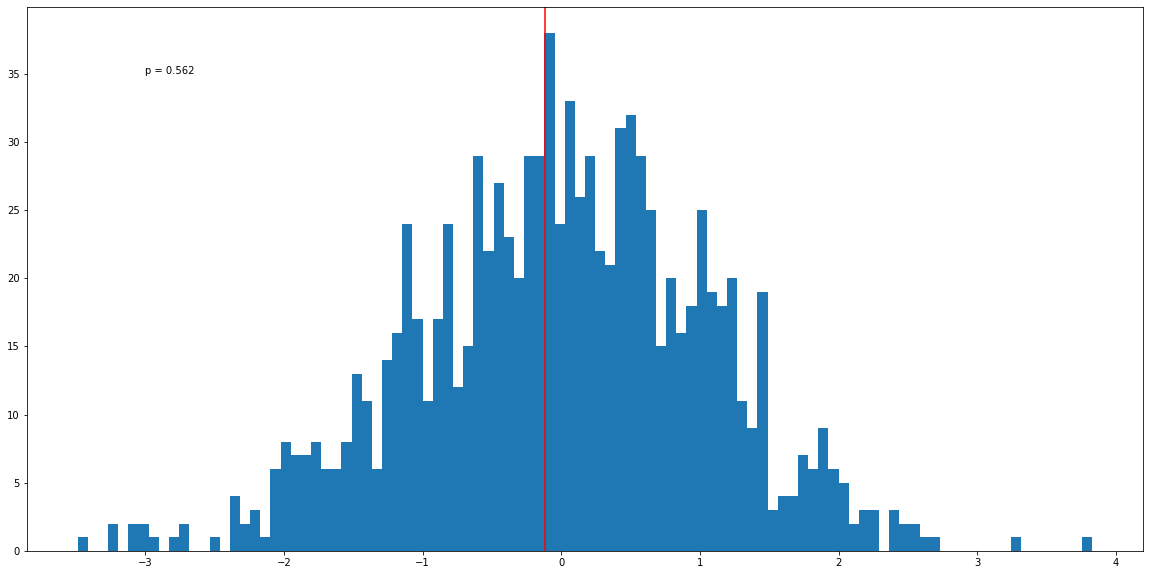

In [29]:
# plot null distribution details
x = np.arange(0,1000,1)
y = result_revisedpath_ttest_nullDistribution['0'].to_numpy()
y = np.reshape(y, (-1,))

plt.figure(figsize=(20,10))
plt.hist(y,bins=100)
plt.axvline(stats.ttest_1samp(result_path_r_fisherz,popmean=0)[0],color='r')

print('instances above red line:', np.count_nonzero(y > stats.ttest_1samp(result_path_r_fisherz,popmean=0)[0]))
print('p val from distribution:', np.count_nonzero(y > stats.ttest_1samp(result_path_r_fisherz,popmean=0)[0]) / len(y))

s = 'p = ' + str(np.count_nonzero(y > stats.ttest_1samp(result_path_r_fisherz,popmean=0)[0]) / len(y))

plt.text(-3,35,s)


instances above red line: 606
p val from distribution: 0.606


Text(-3, 35, 'p = 0.606')

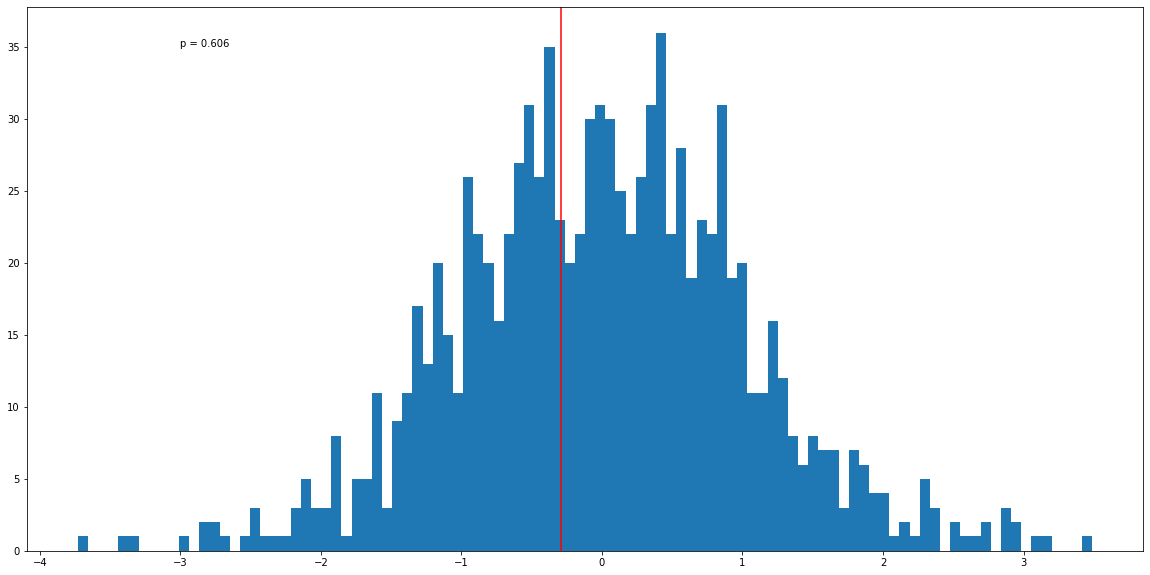

In [30]:
# plot null distribution rituals
x = np.arange(0,1000,1)
y = result_revisedpath_ttest_rituals_nullDistribution['0'].to_numpy()
y = np.reshape(y, (-1,))

plt.figure(figsize=(20,10))
plt.hist(y,bins=100)
plt.axvline(stats.ttest_1samp(result_path_r_rituals_fisherz,popmean=0)[0],color='r')

print('instances above red line:', np.count_nonzero(y > stats.ttest_1samp(result_path_r_rituals_fisherz,popmean=0)[0]))
print('p val from distribution:', np.count_nonzero(y > stats.ttest_1samp(result_path_r_rituals_fisherz,popmean=0)[0]) / len(y))

s = 'p = ' + str(np.count_nonzero(y > stats.ttest_1samp(result_path_r_rituals_fisherz,popmean=0)[0]) / len(y))

plt.text(-3,35,s)


## PERCEPTION

In [31]:


result_perception = pd.DataFrame(columns=[])
result_perception_r = pd.DataFrame(columns=[])
result_perception_r_rituals = pd.DataFrame(columns=[])

for CurrSub in AllSubjects: 

    sub = "sub-1%02d" % (CurrSub)
    #print(sub)
    sub2 = 's%d' % (CurrSub)
    
    Correct_minus_Incorrect_Details = EpisodicDetails_Correct.loc[:, [sub2]]-EpisodicDetails_Incorrect.loc[:, [sub2]]
    Correct_minus_Incorrect_Rituals = Rituals_Correct.loc[:, [sub2]]-Rituals_Incorrect.loc[:, [sub2]] 

    result_perception_tmp = pd.DataFrame(columns=[])
    result_perception_tmp_subj = pd.DataFrame(columns=[])
    
    for currLoop in range(12): # loop over 12 weddings
        
        result_perception_averageCurrLoop = pd.DataFrame(columns=[])
        
        #append event2
        result_perception_tmp = result_perception_tmp.append(pd.Series(dictionary_with_info_perception[sub][str(currLoop)]['2'],name=currLoop))
        result_perception_averageCurrLoop = result_perception_averageCurrLoop.append(pd.Series(dictionary_with_info_perception[sub][str(currLoop)]['2'],name=currLoop))

        #append event3
        result_perception_tmp = result_perception_tmp.append(pd.Series(dictionary_with_info_perception[sub][str(currLoop)]['3'],name=currLoop))
        result_perception_averageCurrLoop = result_perception_averageCurrLoop.append(pd.Series(dictionary_with_info_perception[sub][str(currLoop)]['3'],name=currLoop))

        #append event4
        result_perception_tmp = result_perception_tmp.append(pd.Series(dictionary_with_info_perception[sub][str(currLoop)]['4'],name=currLoop))
        result_perception_averageCurrLoop = result_perception_averageCurrLoop.append(pd.Series(dictionary_with_info_perception[sub][str(currLoop)]['4'],name=currLoop))

        result_perception_tmp_subj = result_perception_tmp_subj.append(pd.Series(result_perception_averageCurrLoop.mean(),name=currLoop))
        
    # append average (across event2/3/4) of subj to result_perception dataframe
    
    result_perception = result_perception.append(pd.Series(result_perception_tmp.mean(),name=CurrSub))

    #within subj correlation
    result_perception_r = result_perception_r.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Details,result_perception_tmp_subj)[0],name=CurrSub))
    result_perception_r_rituals = result_perception_r_rituals.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Rituals,result_perception_tmp_subj)[0],name=CurrSub))

#fisher z transform before t test
result_perception_r_fisherz = np.arctanh(result_perception_r)
result_perception_r_rituals_fisherz = np.arctanh(result_perception_r_rituals)


In [32]:
# print the mean and sem of the R values

print('mean r (details)', result_perception_r_fisherz.mean())
print('sem r (details)', result_perception_r_fisherz.sem())

print('mean r (rituals)', result_perception_r_rituals_fisherz.mean())
print('sem r (rituals)', result_perception_r_rituals_fisherz.sem())

mean r (details) 0   -0.045293
dtype: float64
sem r (details) 0    0.046937
dtype: float64
mean r (rituals) 0   -0.049174
dtype: float64
sem r (rituals) 0    0.052673
dtype: float64


In [ ]:
# null distribution (only ran once, than load saved distributions)

result_perception_ttest_nullDistribution = pd.DataFrame(columns=[])
result_perception_ttest_rituals_nullDistribution = pd.DataFrame(columns=[])
result_perception_ttest_confusions_nullDistribution = pd.DataFrame(columns=[])

for currIter in range(1000): 

    print(currIter)
    
    shuffle_tmp = pd.DataFrame(columns=[])
    shuffle_tmp2 = pd.DataFrame(columns=[])
    shuffle_tmp3 = pd.DataFrame(columns=[])

    for CurrSub in AllSubjects: 

        sub = "sub-1%02d" % (CurrSub)
        #print(sub)
        sub2 = 's%d' % (CurrSub)

        Correct_minus_Incorrect_Details = EpisodicDetails_Correct.loc[:, [sub2]]-EpisodicDetails_Incorrect.loc[:, [sub2]] 
        Correct_minus_Incorrect_Rituals = Rituals_Correct.loc[:, [sub2]]-Rituals_Incorrect.loc[:, [sub2]]
        Correct_minus_Incorrect_Confusions = EpisodicDetails_withinSchemaConfusions.loc[:, [sub2]]-EpisodicDetails_acrossSchemaConfusions.loc[:, [sub2]] 
    
   
        result_perception_tmp = pd.DataFrame(columns=[])
        result_perception_tmp_subj = pd.DataFrame(columns=[])

        for currLoop in range(12): # loop over 12 weddings

            result_perception_averageCurrLoop = pd.DataFrame(columns=[])

            #append event2
            result_perception_tmp = result_perception_tmp.append(pd.Series(dictionary_with_info_perception[sub][str(currLoop)]['2'],name=currLoop))
            result_perception_averageCurrLoop = result_perception_averageCurrLoop.append(pd.Series(dictionary_with_info_perception[sub][str(currLoop)]['2'],name=currLoop))
            
            #append event3
            result_perception_tmp = result_perception_tmp.append(pd.Series(dictionary_with_info_perception[sub][str(currLoop)]['3'],name=currLoop))
            result_perception_averageCurrLoop = result_perception_averageCurrLoop.append(pd.Series(dictionary_with_info_perception[sub][str(currLoop)]['3'],name=currLoop))

            #append event4
            result_perception_tmp = result_perception_tmp.append(pd.Series(dictionary_with_info_perception[sub][str(currLoop)]['4'],name=currLoop))
            result_perception_averageCurrLoop = result_perception_averageCurrLoop.append(pd.Series(dictionary_with_info_perception[sub][str(currLoop)]['4'],name=currLoop))

            result_perception_tmp_subj = result_perception_tmp_subj.append(pd.Series(result_perception_averageCurrLoop.mean(),name=currLoop))

        ## create null distribution by shuffling behavioral scores of 12 weddings within subj and then run correlation, 1000 times
        Correct_minus_Incorrect_Details_shuffle = shuffle(Correct_minus_Incorrect_Details)
        Correct_minus_Incorrect_Details_shuffle = Correct_minus_Incorrect_Details_shuffle.to_numpy()
        shuffle_tmp = shuffle_tmp.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Details_shuffle,result_perception_tmp_subj)[0],name=CurrSub))

        Correct_minus_Incorrect_Rituals_shuffle = shuffle(Correct_minus_Incorrect_Rituals)
        Correct_minus_Incorrect_Rituals_shuffle = Correct_minus_Incorrect_Rituals_shuffle.to_numpy()
        shuffle_tmp2 = shuffle_tmp2.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Rituals_shuffle,result_perception_tmp_subj)[0],name=CurrSub))
        
        Correct_minus_Incorrect_Confusions_shuffle = shuffle(Correct_minus_Incorrect_Confusions)
        Correct_minus_Incorrect_Confusions_shuffle = Correct_minus_Incorrect_Confusions_shuffle.to_numpy()
        shuffle_tmp3 = shuffle_tmp2.append(pd.Series(stats.spearmanr(Correct_minus_Incorrect_Confusions_shuffle,result_perception_tmp_subj)[0],name=CurrSub))


    #fisher z transform before t test
    shuffle_tmp_fisherz = np.arctanh(shuffle_tmp)
    shuffle_tmp2_fisherz = np.arctanh(shuffle_tmp2)
    shuffle_tmp3_fisherz = np.arctanh(shuffle_tmp3)

    result_perception_ttest_nullDistribution = result_perception_ttest_nullDistribution.append(pd.Series(stats.ttest_1samp(shuffle_tmp_fisherz,popmean=0)[0],name=currIter))
    result_perception_ttest_rituals_nullDistribution = result_perception_ttest_rituals_nullDistribution.append(pd.Series(stats.ttest_1samp(shuffle_tmp2_fisherz,popmean=0)[0],name=currIter))

    result_perception_ttest_confusions_nullDistribution = result_perception_ttest_confusions_nullDistribution.append(pd.Series(stats.ttest_1samp(shuffle_tmp3_fisherz,popmean=0)[0],name=currIter))

result_perception_ttest_nullDistribution.to_csv('result_perception_ttest_nullDistribution_NEW.csv')
result_perception_ttest_rituals_nullDistribution.to_csv('result_perception_ttest_rituals_nullDistribution_NEW.csv')


In [37]:
## LOAD NULL DISTRIBUTIONS (SINCE IT WAS ALREADY RAN AND SAVED)

result_perception_ttest_nullDistribution = pd.read_csv('/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/result_perception_ttest_nullDistribution_NEW.csv')
result_perception_ttest_rituals_nullDistribution = pd.read_csv('/Users/silvycollin/Documents/GitHub/schema/final_code/roi_average_folder_Ross/result_perception_ttest_rituals_nullDistribution_NEW.csv')


instances above red line: 811
p val from distribution: 0.811


Text(-3, 35, 'p = 0.811')

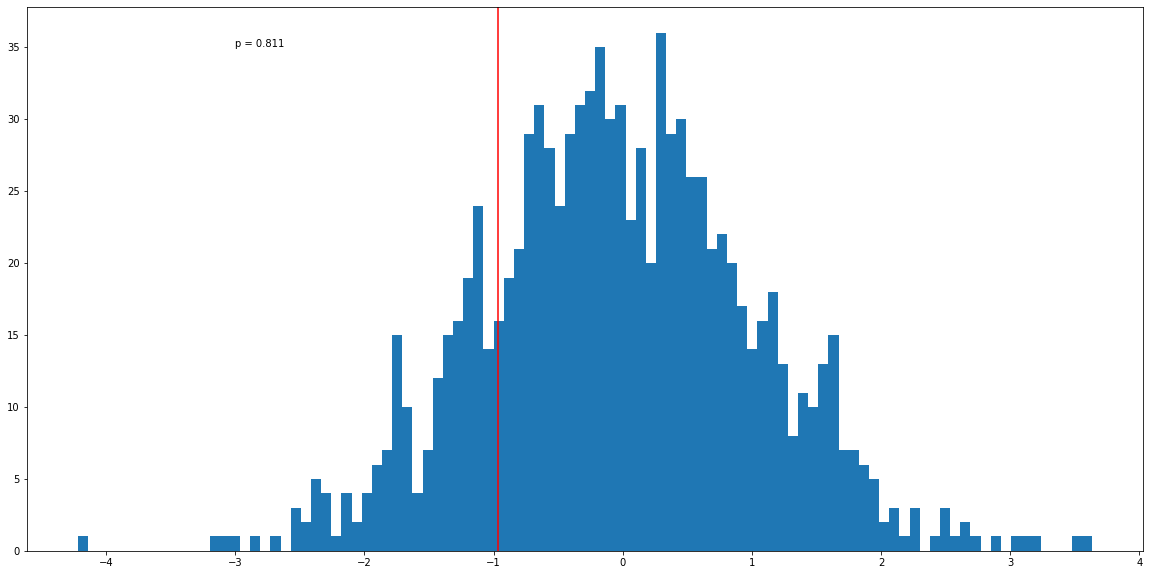

In [39]:
# plot null distribution details
x = np.arange(0,1000,1)
y = result_perception_ttest_nullDistribution['0'].to_numpy()
y = np.reshape(y, (-1,))

plt.figure(figsize=(20,10))
plt.hist(y,bins=100)
plt.axvline(stats.ttest_1samp(result_perception_r_fisherz,popmean=0)[0],color='r')

print('instances above red line:', np.count_nonzero(y > stats.ttest_1samp(result_perception_r_fisherz,popmean=0)[0]))
print('p val from distribution:', np.count_nonzero(y > stats.ttest_1samp(result_perception_r_fisherz,popmean=0)[0]) / len(y))

s = 'p = ' + str(np.count_nonzero(y > stats.ttest_1samp(result_perception_r_fisherz,popmean=0)[0]) / len(y))

plt.text(-3,35,s)


instances above red line: 833
p val from distribution: 0.833


Text(-3, 35, 'p = 0.833')

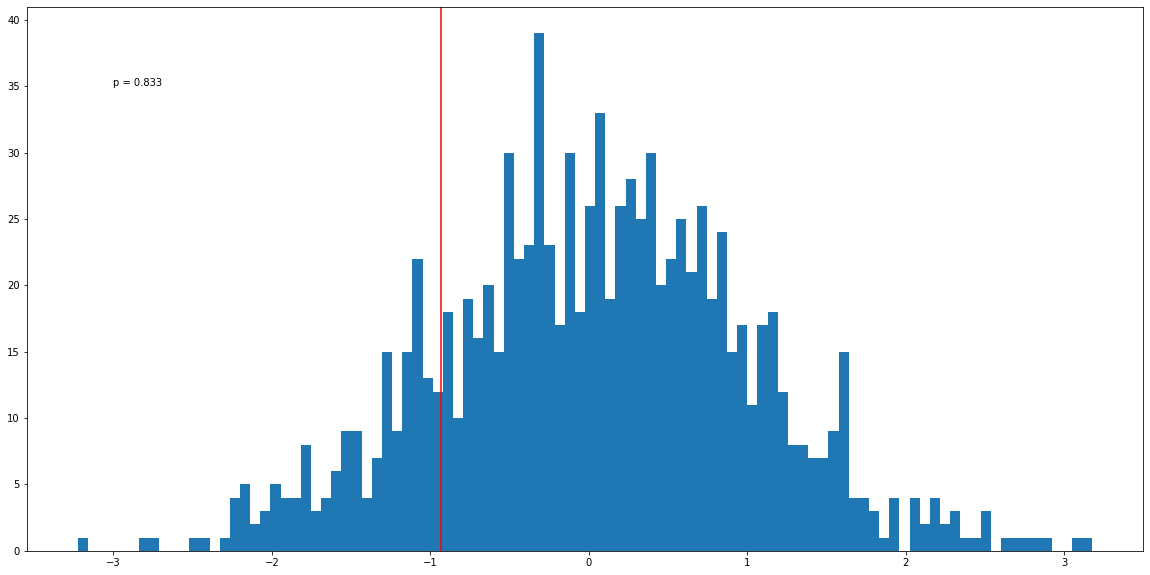

In [40]:
# plot null distribution rituals
x = np.arange(0,1000,1)
y = result_perception_ttest_rituals_nullDistribution['0'].to_numpy()
y = np.reshape(y, (-1,))

plt.figure(figsize=(20,10))
plt.hist(y,bins=100)
plt.axvline(stats.ttest_1samp(result_perception_r_rituals_fisherz,popmean=0)[0],color='r')

print('instances above red line:', np.count_nonzero(y > stats.ttest_1samp(result_perception_r_rituals_fisherz,popmean=0)[0]))
print('p val from distribution:', np.count_nonzero(y > stats.ttest_1samp(result_perception_r_rituals_fisherz,popmean=0)[0]) / len(y))

s = 'p = ' + str(np.count_nonzero(y > stats.ttest_1samp(result_perception_r_rituals_fisherz,popmean=0)[0]) / len(y))

plt.text(-3,35,s)
